# 01. First-Order Equations

In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import IPython
import sklearn
import nltk

from IPython.display import Image
%matplotlib inline

import datetime
dt = datetime.datetime.now()

print(
'''{}-{}-{} {}:{}:{}
----------------------
numpy\t\t{}
scipy\t\t{}
pandas\t\t{}
matplotlib\t{}
----------------------
ipython\t\t{}
----------------------
sklearn\t\t{}
nltk\t\t{}'''.format(
    dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, 
    np.__version__, 
    scipy.__version__, 
    pd.__version__, 
    matplotlib.__version__, 
    IPython.__version__, 
    sklearn.__version__, 
    nltk.__version__))

2019-4-30 18:14:51
----------------------
numpy		1.15.2
scipy		1.1.0
pandas		0.24.1
matplotlib	3.0.0
----------------------
ipython		7.2.0
----------------------
sklearn		0.20.0
nltk		3.2.5


In [24]:
c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

## 01.01. The Simplest Example

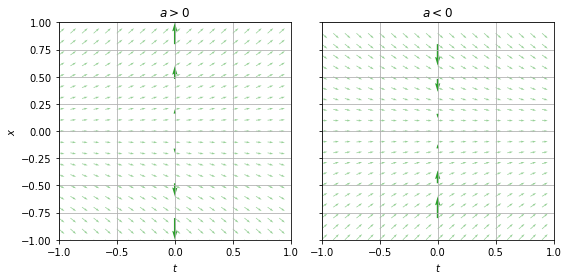

In [27]:
def dx_dt(x, a):
    return x * a

def x(x, a, k):
    return k * np.e ** (a * t)

k, t = 1, 1
aa = np.array([1, -1])

fig, axs = plt.subplots(figsize=(8, 4), ncols=2, sharex=True, sharey=True)

# ax.plot()
X, T = np.meshgrid(np.arange(-1.0, 1.0, 0.1), np.arange(-1.0, 1.0, 0.1))
x = np.linspace(-0.8, 0.8, 6)

for ax, a in zip(axs, aa):
    ax.quiver(T, X, np.repeat(t, len(X)*len(Y)), dx_dt(X, a), alpha=.5, color=c[2])
    ax.quiver(np.repeat(0, len(x)), x, np.repeat(0, len(x)), dx_dt(x, a), color=c[2])
    ax.grid(True)
    ax.set_xlabel(r'$t$')
    if a > 0:
        ax.set_title(r'$a > 0$')
    elif a < 0:
        ax.set_title(r'$a < 0$')
    elif a == 0:
        ax.set_title(r'$a = 0$')
    
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)

axs[0].set_ylabel(r'$x$')


plt.tight_layout()
plt.savefig('fig/fig_01_01.png')
plt.show()